In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd

In [7]:
x, y =make_blobs(n_samples=500, n_features=2, centers=4, random_state=1)

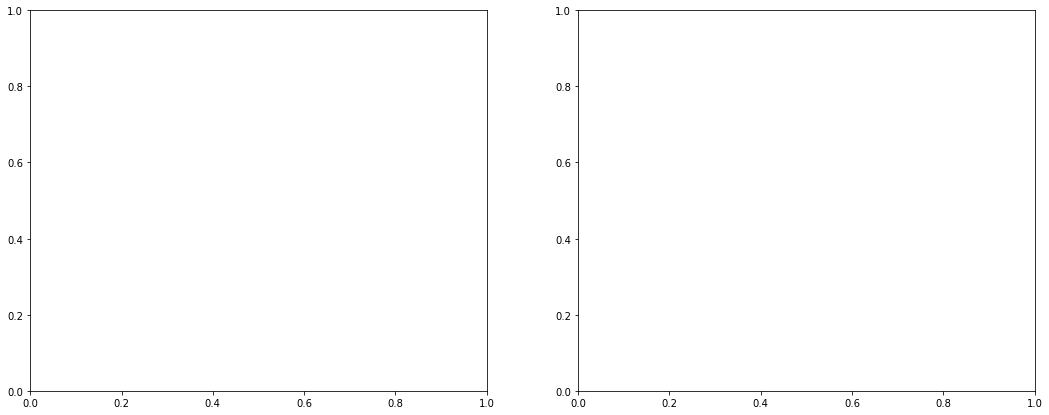

In [2]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

In [3]:
#轮廓系数横向条形图
ax1.set_xlim([-.1, 1])

(-0.1, 1)

In [8]:
n_clusters = 4
ax1.set_ylim([0, x.shape[0] + (n_clusters+1) * 10])

(0, 550)

In [10]:
#建模
cluster = KMeans(n_clusters=n_clusters, random_state=10).fit(x)
cluster_labels = cluster.labels_

In [14]:
sample_values = silhouette_samples(x, cluster_labels)

In [17]:
y_lower = 10
for i in range(n_clusters):
    ith_values = sample_values[cluster_labels == i]
    #排序，方便好看
    ith_values.sort()
    
    size_i = ith_values.shape[0]
    y_upper = y_lower + size_i
    
    #调用颜色，根据给定的小数字生成颜色
    color = cm.nipy_spectral(float(i)/ n_clusters)
    
    ax1.fill_betweenx(np.arange(y_lower, y_upper)
                     , ith_values
                     ,facecolor=color
                     ,alpha=.7
                     )
    
    ax1.text(-.05
            , y_lower + .5 * size_i
            ,str(i))
    y_lower = y_upper + 10

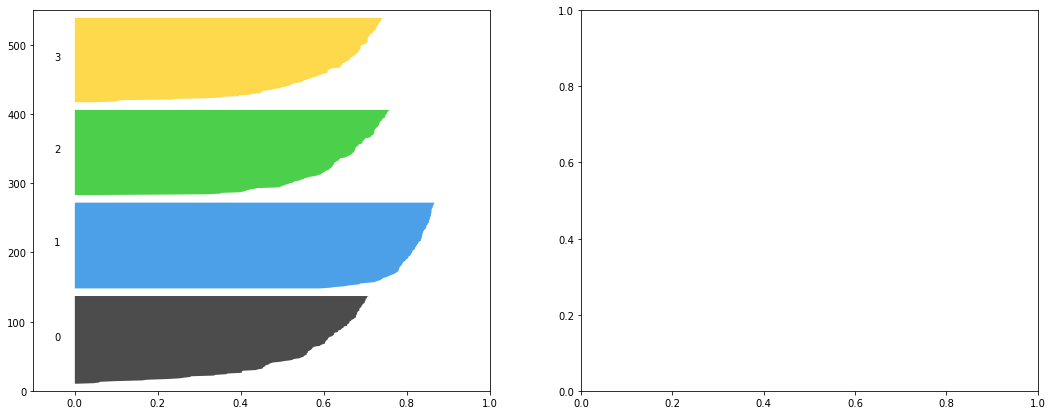

In [19]:
fig

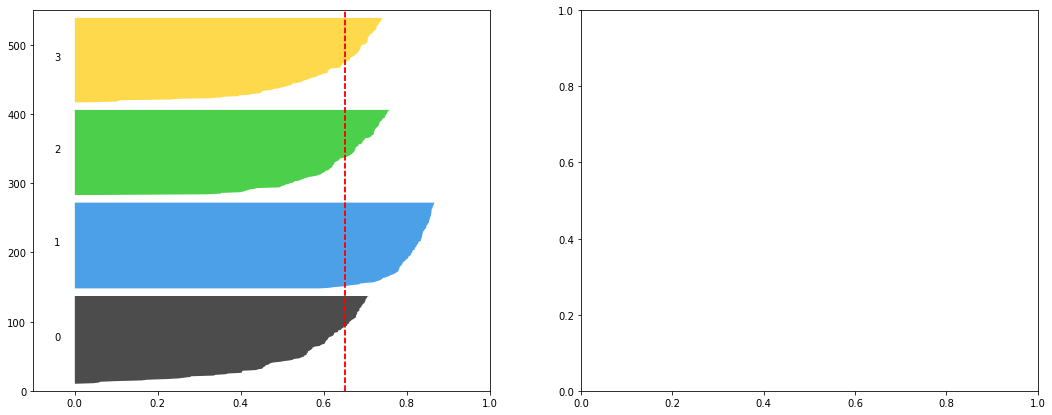

In [23]:
#使用虚线画出轮廓系数均值
sil_avg = silhouette_score(x, cluster_labels)
ax1.axvline(x=sil_avg, color='red',linestyle='--')
fig

In [25]:
#画出聚类的样子
colors = cm.nipy_spectral(cluster_labels.astype(float)/n_clusters)
ax2.scatter(x[:, 0], x[:, 1]
           ,marker='o'
           ,c=colors)
center = cluster.cluster_centers_
ax2.scatter(center[:, 0], center[:, 1]
           ,marker='o'
           ,c = 'red', alpha=1, s=200)

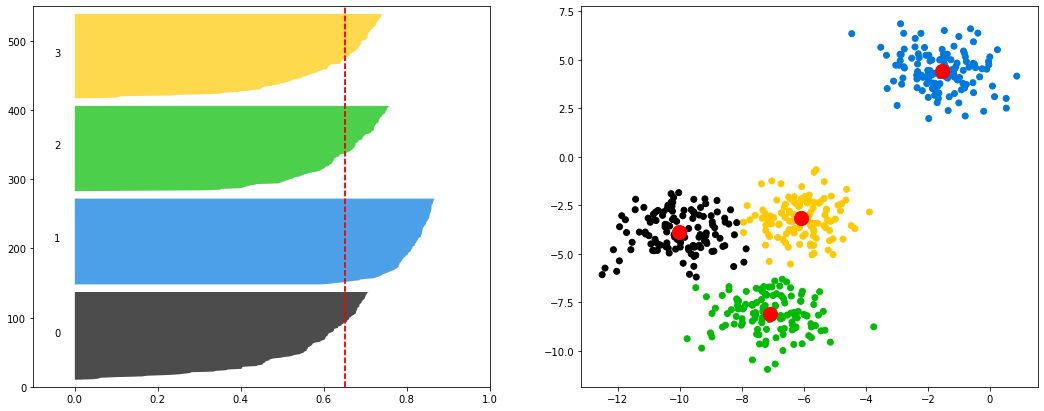

In [26]:
fig